In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline



In [3]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

In [4]:
# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-02,138.729996,138.809998,136.470001,138.070007,138.070007,52236700,AMAZON
2023-11-03,138.990005,139.490005,137.449997,138.600006,138.600006,44007200,AMAZON
2023-11-06,138.759995,140.729996,138.360001,139.740005,139.740005,44970400,AMAZON
2023-11-07,140.550003,143.369995,140.500000,142.710007,142.710007,53553500,AMAZON
2023-11-08,142.970001,143.119995,141.220001,142.080002,142.080002,44521700,AMAZON
2023-11-09,142.020004,142.649994,139.839996,140.600006,140.600006,36235400,AMAZON
2023-11-10,140.460007,143.649994,139.910004,143.559998,143.559998,49287800,AMAZON
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,AMAZON
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,AMAZON


In [50]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,242.000000,232.000000,202.000000,250.000000
mean,165.993029,167.667928,164.605299,166.238247,165.715133,6.247221e+07,165.676469,165.885411,167.370954,0.001061
std,18.387562,18.228684,18.544526,18.369925,18.515325,1.853186e+07,18.256268,18.057292,16.486957,0.014371
min,126.010002,127.769997,124.169998,125.019997,124.325081,3.145820e+07,127.543099,130.216155,137.989307,-0.048020
25%,150.180000,152.264999,148.815002,150.939995,150.130844,5.002805e+07,149.844512,149.953333,153.847253,-0.007567
50%,171.089996,173.070007,170.419998,171.770004,171.103226,5.828040e+07,172.340027,173.460887,173.922159,0.001714
75%,179.485001,180.669998,177.520004,179.294998,179.048027,6.956585e+07,178.660374,179.819473,181.434198,0.009012
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08,193.697906,192.118620,186.948323,0.048594


In [55]:
df1 = df.reset_index()['Close']
df1.shape

(2988,)

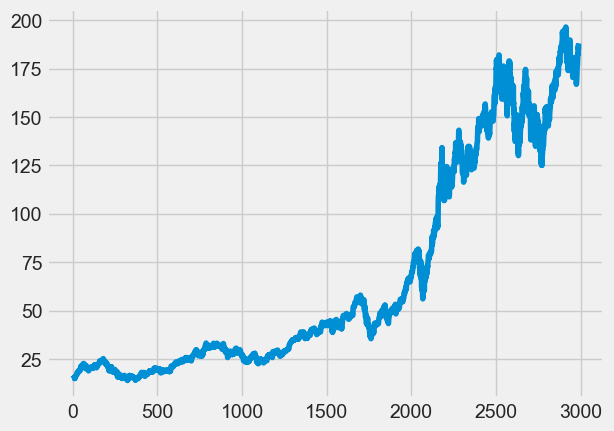

In [56]:
plt.plot(df1)

In [58]:
from sklearn. preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1) .reshape(-1,1))
df1

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.93616529],
       [0.95063084],
       [0.95375404]])

In [49]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,242.000000,232.000000,202.000000,250.000000
mean,114.164482,115.639642,113.030681,114.393725,114.393725,2.561708e+07,114.336542,114.359306,114.443004,0.001480
std,16.848944,16.866859,16.796072,16.812041,16.812041,1.064698e+07,16.507497,16.305700,14.914775,0.019875
min,86.720001,88.209999,85.570000,86.459999,86.459999,8.567800e+06,88.345000,89.479000,94.004600,-0.095989
25%,98.044998,99.640003,96.790001,98.660000,98.660000,1.932505e+07,98.189501,97.954875,99.006800,-0.009913
50%,117.839996,119.894997,116.830002,119.010002,119.010002,2.272430e+07,120.090500,119.148750,116.798700,0.000552
75%,129.805000,131.402496,128.837502,130.009995,130.009995,2.821805e+07,130.214751,130.421125,127.467600,0.012539
max,142.160004,142.380005,139.839996,141.699997,141.699997,9.779860e+07,139.773999,137.483501,135.392201,0.072661


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-16 to 2023-11-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


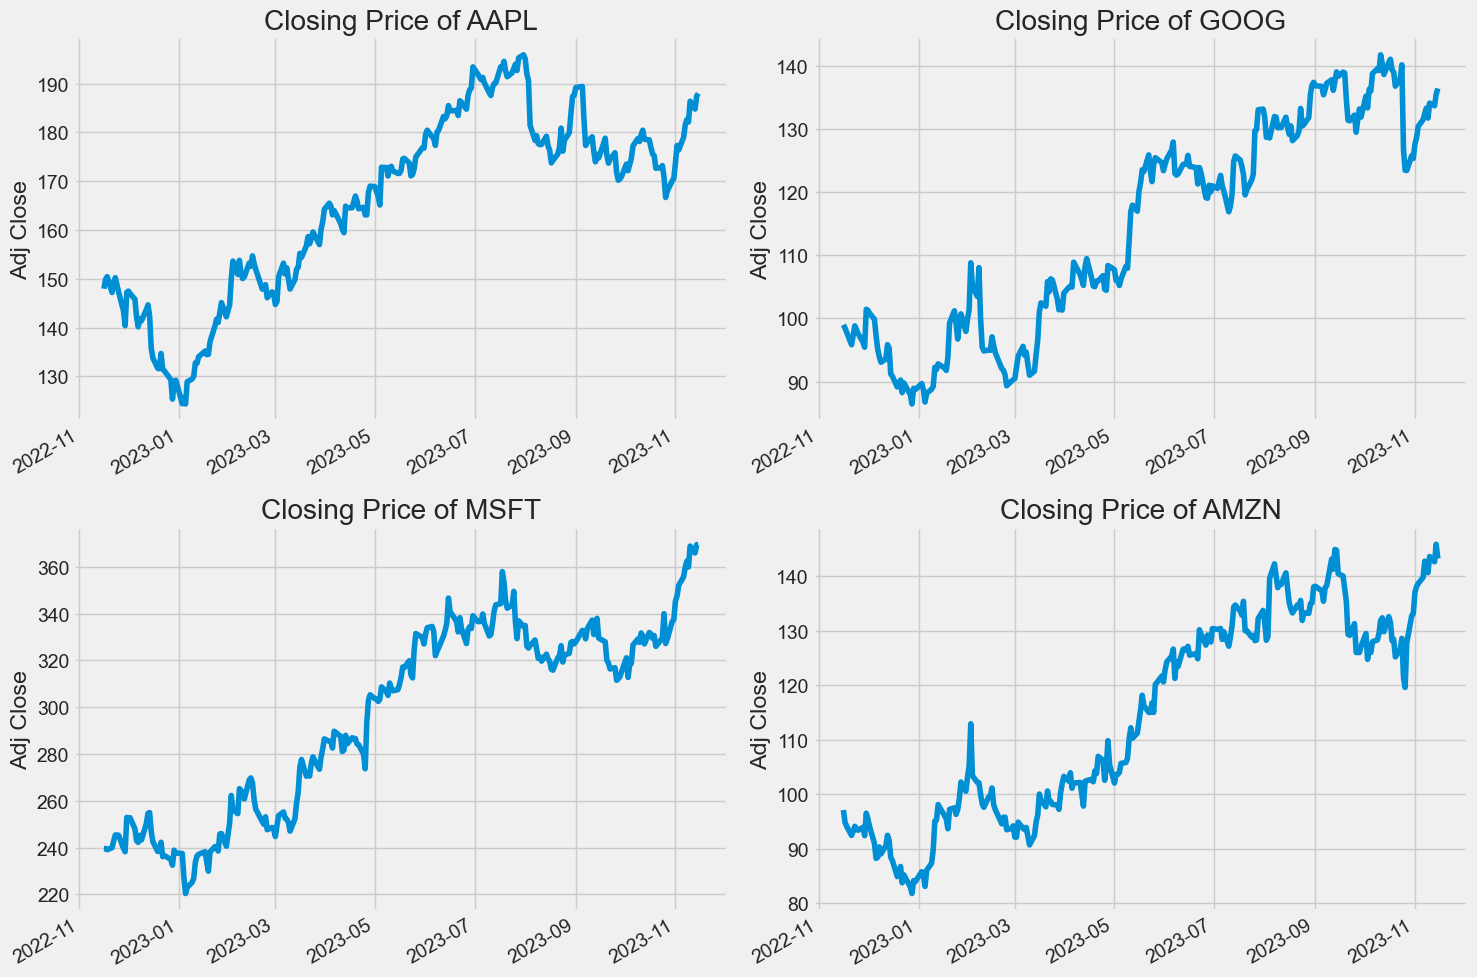

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

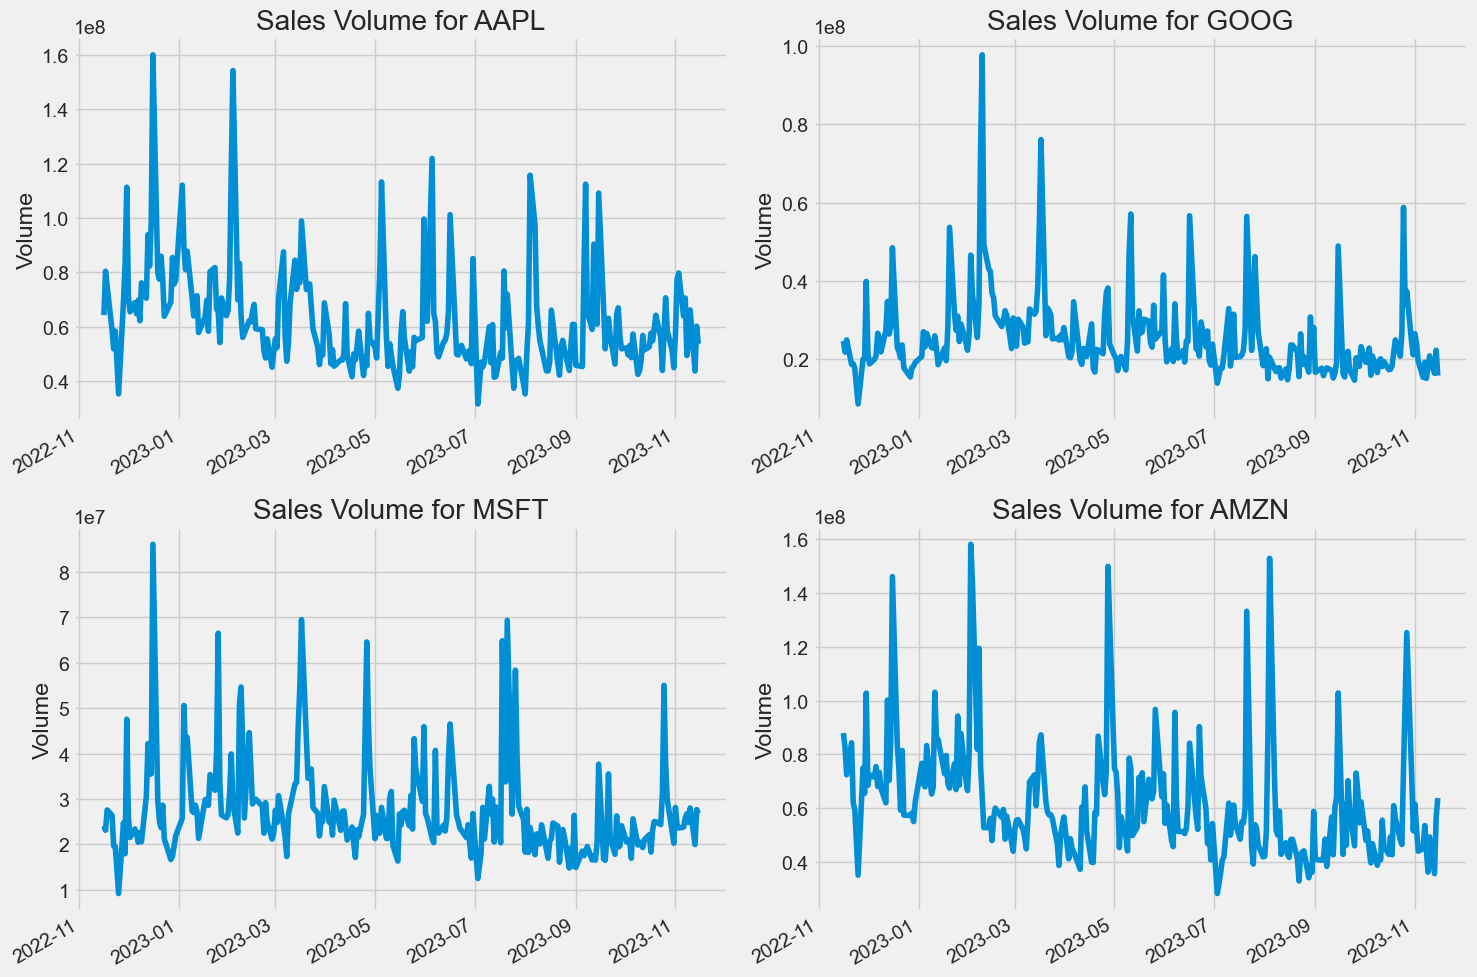

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

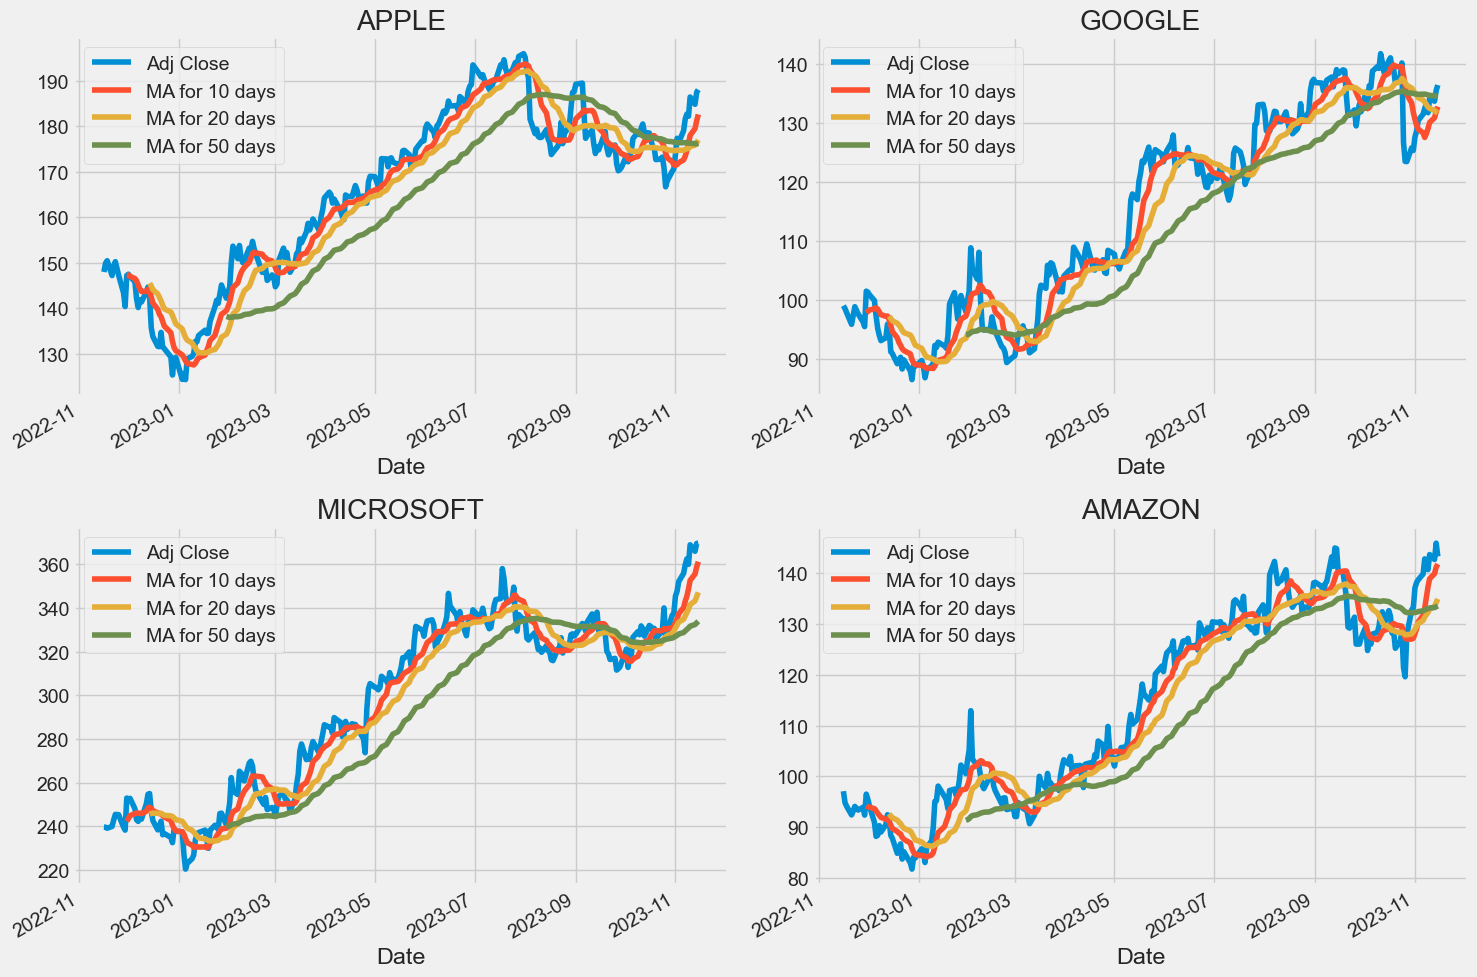

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


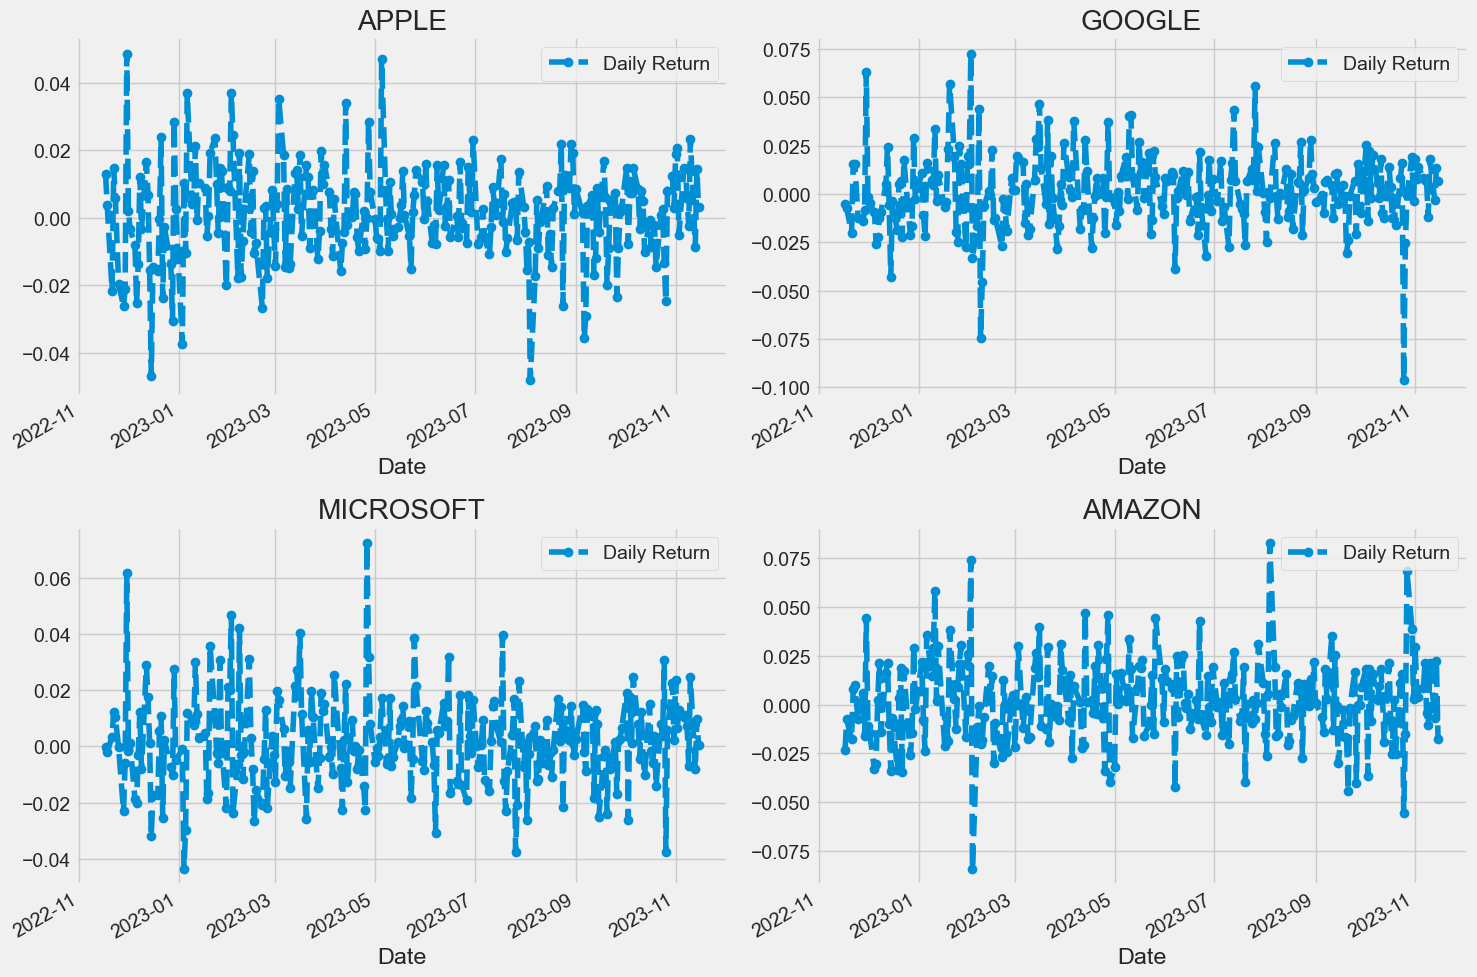

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

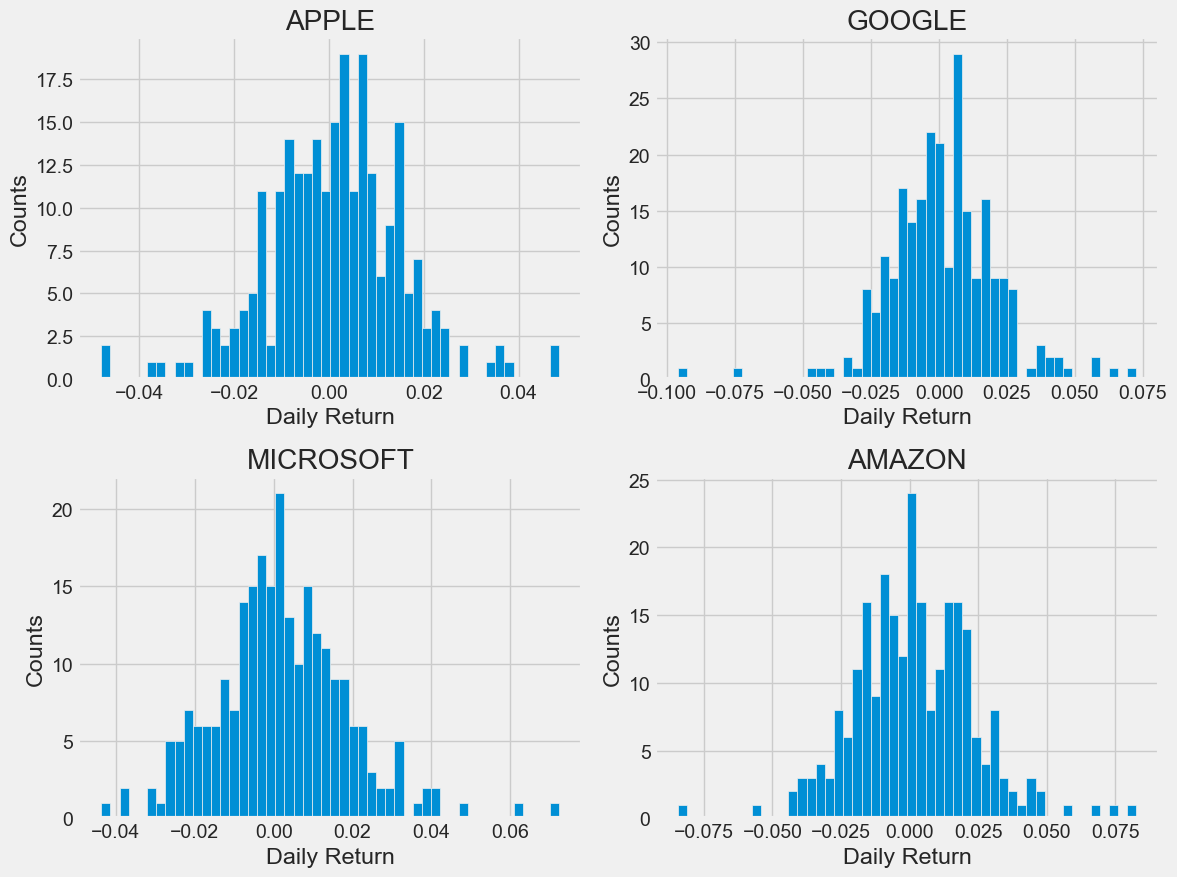

In [11]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [12]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-16,NaN,NaN,NaN,NaN
2022-11-17,0.012971,-0.023373,-0.004950,-0.000207
2022-11-18,0.003782,-0.007485,-0.007107,-0.001903
2022-11-21,-0.021680,-0.017846,-0.020143,0.003441
2022-11-22,0.014661,0.008003,0.015653,0.012312


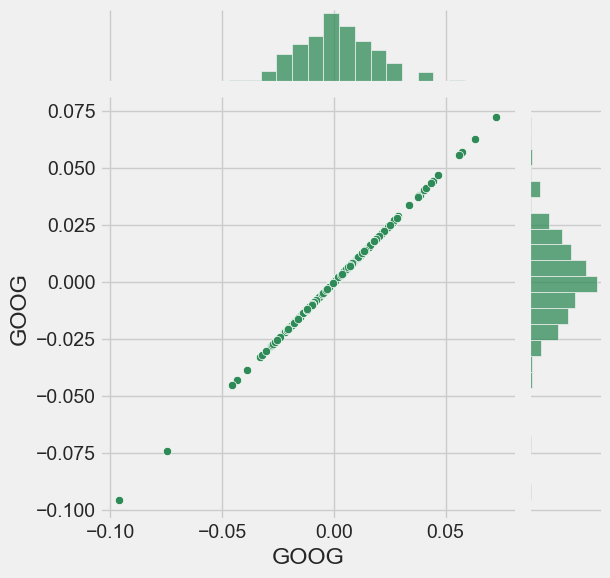

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


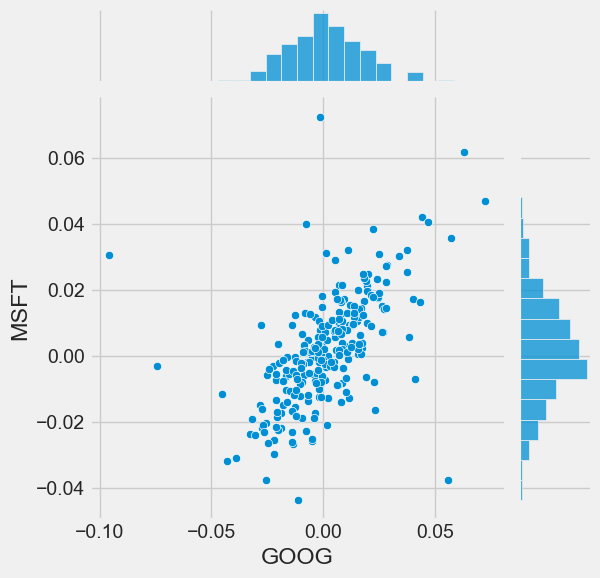

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

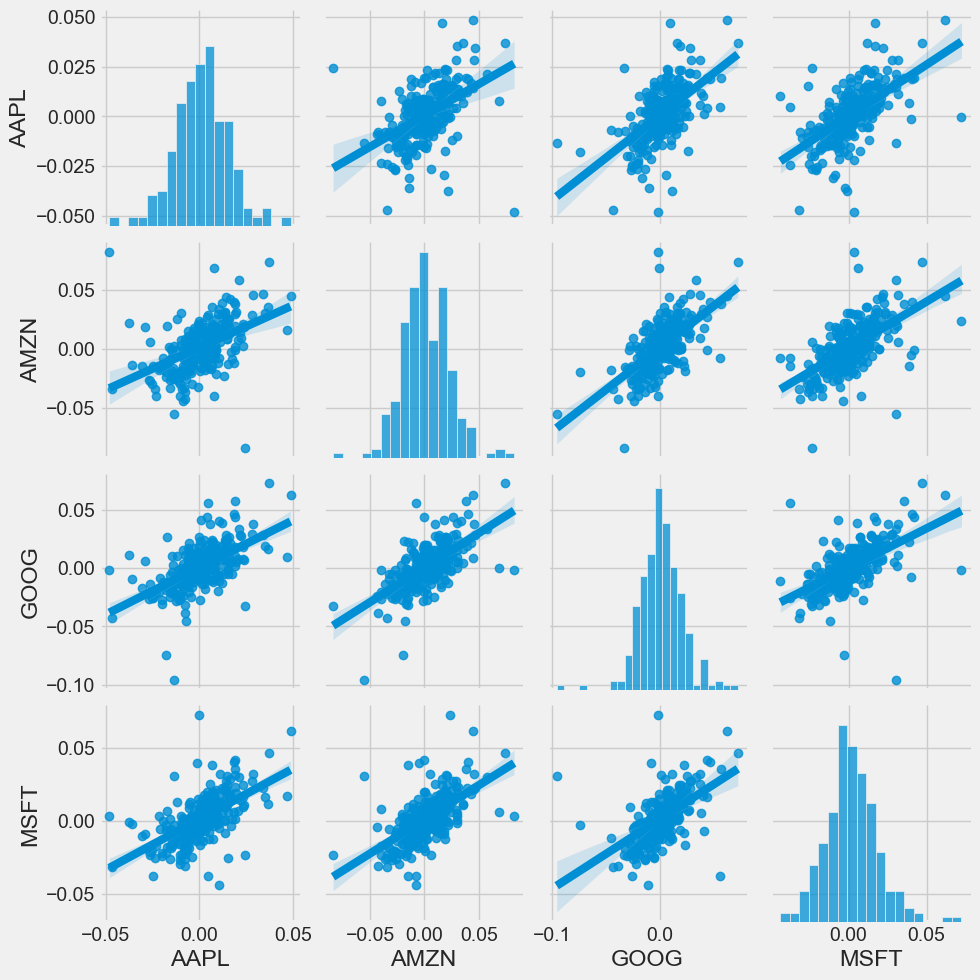

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

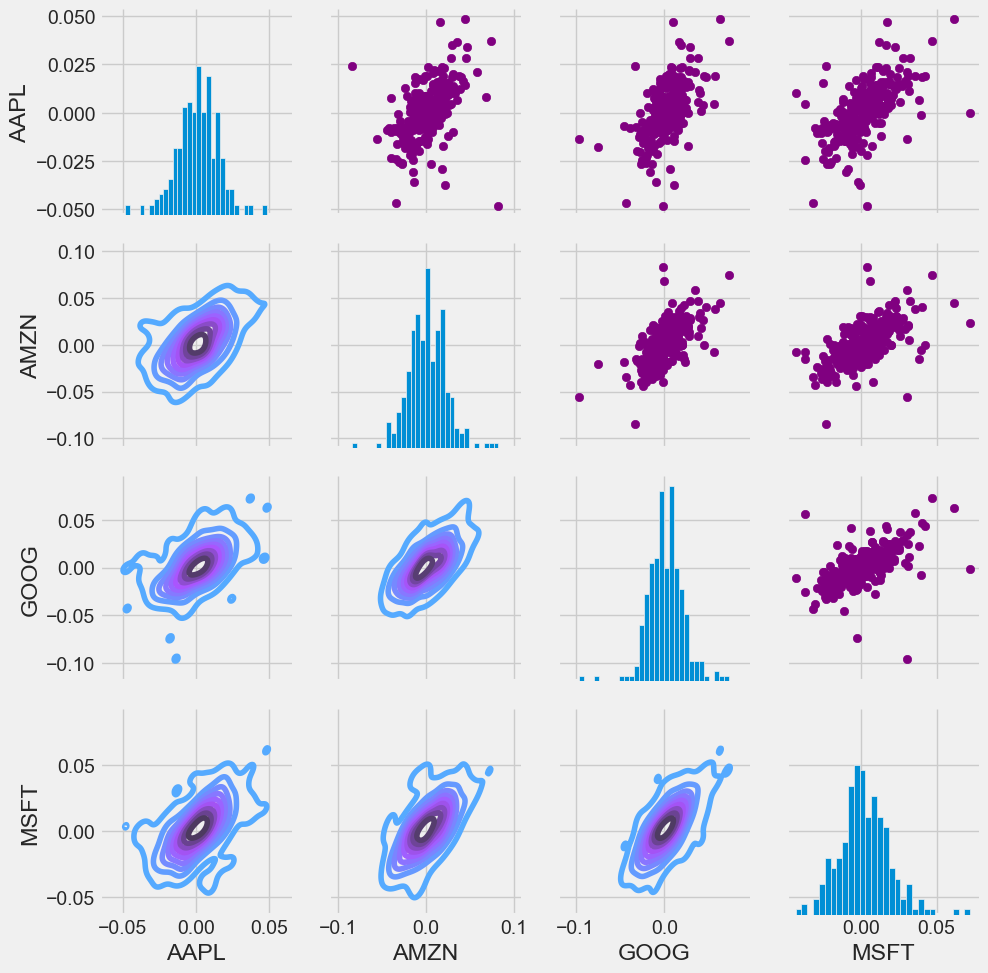

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

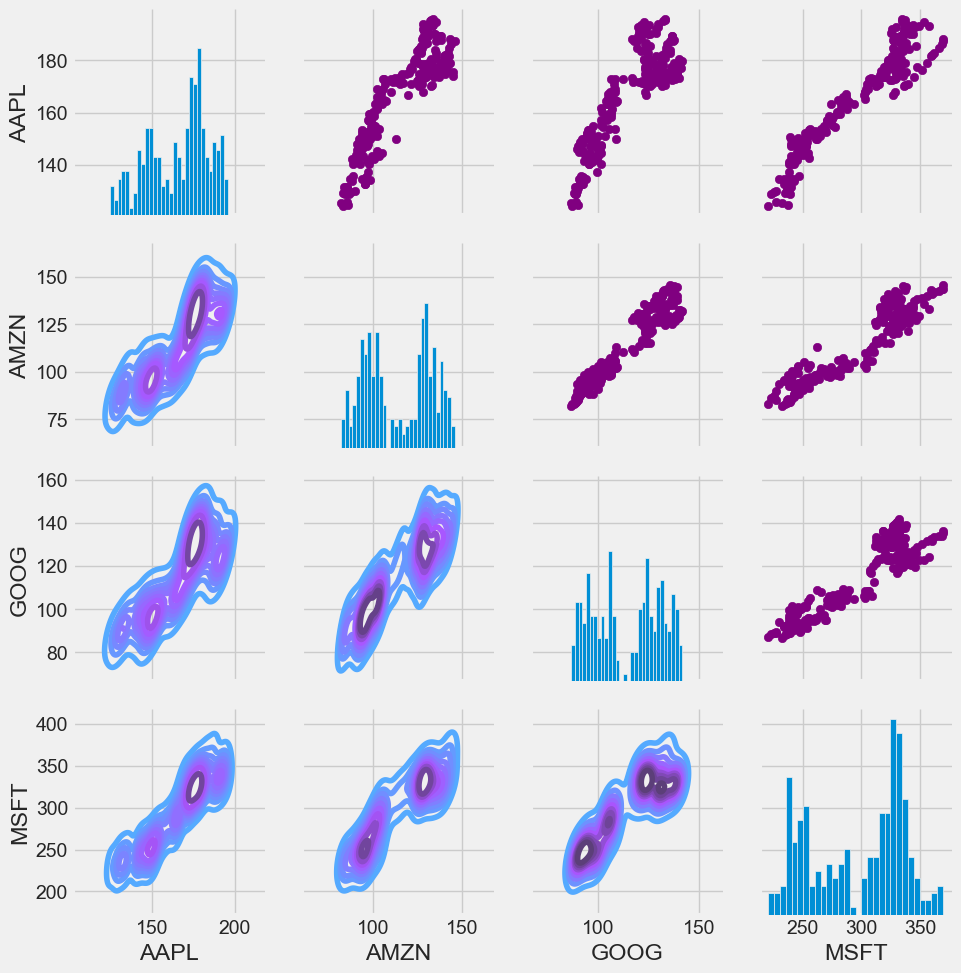

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

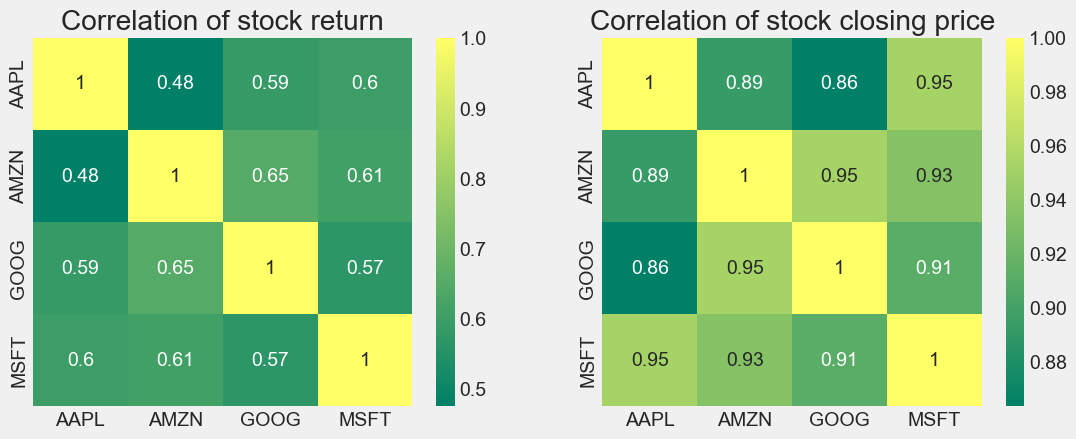

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

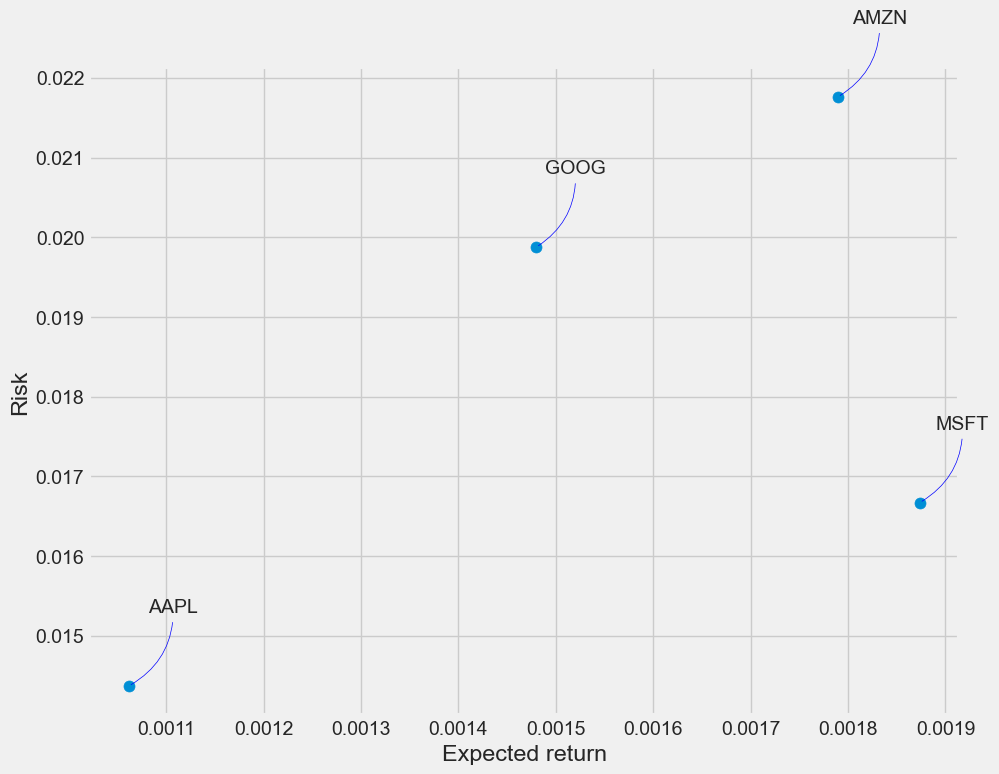

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [20]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449690,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516600,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655556,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787853,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767573,394024400
...,...,...,...,...,...,...
2023-11-09,182.960007,184.119995,181.809998,182.410004,182.169998,53763500
2023-11-10,183.970001,186.570007,183.529999,186.399994,186.399994,66133400
2023-11-13,185.820007,186.029999,184.210007,184.800003,184.800003,43627500


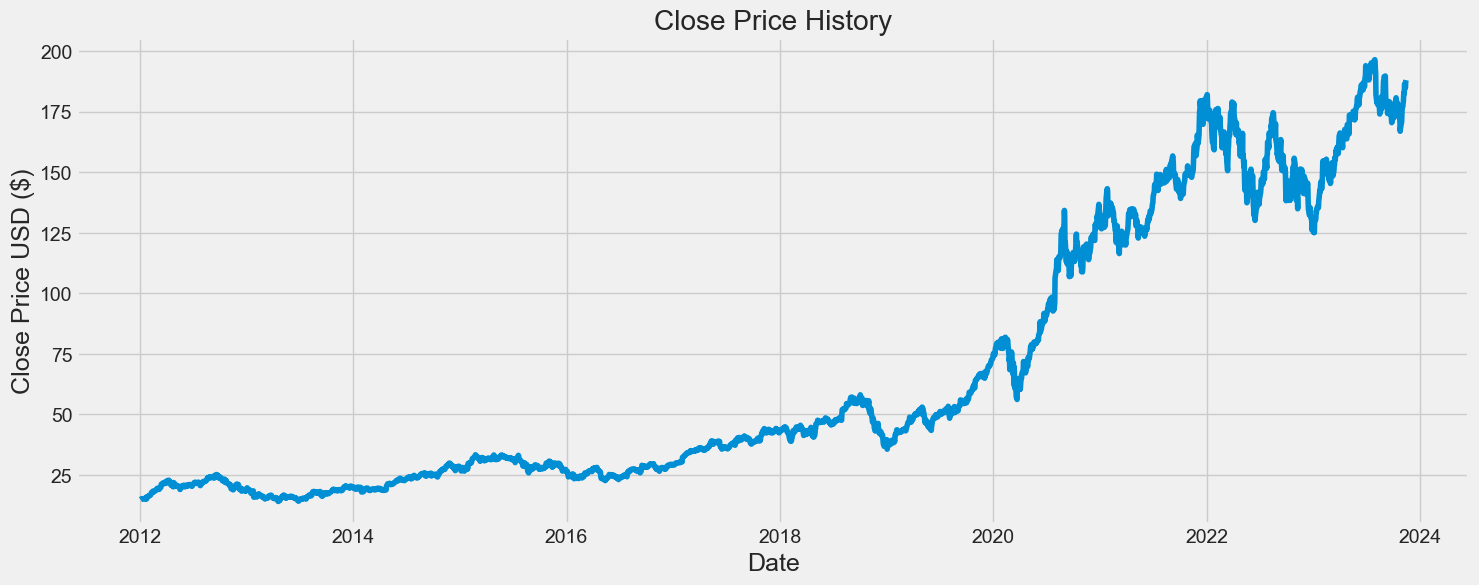

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on


2839

In [26]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.93616529],
       [0.95063084],
       [0.95375404]])

In [79]:
training_data_len = int(np.ceil( len(dataset) * 0.65))
training_data_len
test_data = len(dataset) - training_data_len
training_data_len,test_data=dataset[0:training_data_len,:],dataset[test_data:len(dataset),:1]

In [80]:
training_data_len, test_data

(array([[14.6867857 ],
        [14.76571369],
        [14.92964268],
        ...,
        [55.24000168],
        [54.43249893],
        [54.68000031]]),
 array([[ 25.13249969],
        [ 25.1875    ],
        [ 25.375     ],
        ...,
        [184.80000305],
        [187.44000244],
        [188.00999451]]))

In [81]:
len(training_data_len), len(test_data)

(1943, 1943)

In [83]:
import numpy as np

def create_dataset(dataset,time_step=1) :
    dataX, dataY = [], []
    for i in range(len(dataset) -time_step-1):
        a = dataset[i:(i+time_step), 0]

        dataX.append (a)
        dataY. append(dataset[i + time_step, 0])
    return np. array(dataX), np. array (dataY)

In [84]:
time_step = 100
X_train, y_train = create_dataset(training_data_len, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [87]:
print(X_train.shape)
print(X_test.shape)

(1842, 100)
(1842, 100)


In [95]:
x_train, y_train = np.array(X_train), np.array(y_train)
X_test, ytest = np.array(X_test), np.array(ytest)

X_train =X_train. reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test. reshape(X_test.shape[0],X_test. shape[1] , 1)

# Y_train =y_train. reshape(y_train.shape[0],y_train.shape[1] , 1)
# X_test = X_test. reshape(ytest.shape[0],ytest. shape[1] , 1)

In [94]:
# # Create the training data set 
# # Create the scaled training data set
# #train_data = scaled_data[0:int(training_data_len), :]
# # Split the data into x_train and y_train data sets

# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i-60:i, 0])
#     y_train.append(train_data[i, 0])
#     if i<= 61:
#         print(x_train)
#         print(y_train)
#         print()
        
# # Convert the x_train and y_train to numpy arrays 
# x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# # x_train.shape
# # x_train.shape

In [96]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (100, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1842/1842 [==============================] - 26s 14ms/step - loss: 33.2797


In [97]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 33201 (129.69 KB)
Trainable params: 33201 (129.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
model.fit(X_train,y_train, validation_data=(X_test,ytest), epochs=100,batch_size=64, verbose=1)

Epoch 1/100
29/29 [==============================] - 3s 91ms/step - loss: 0.5166 - val_loss: 4355.8770
Epoch 2/100
29/29 [==============================] - 2s 73ms/step - loss: 0.4449 - val_loss: 4347.7441
Epoch 3/100
29/29 [==============================] - 2s 84ms/step - loss: 0.4362 - val_loss: 4341.0420
Epoch 4/100
29/29 [==============================] - 2s 83ms/step - loss: 0.4351 - val_loss: 4331.9478
Epoch 5/100
29/29 [==============================] - 2s 85ms/step - loss: 0.4196 - val_loss: 4326.8369
Epoch 6/100
29/29 [==============================] - 2s 85ms/step - loss: 0.4155 - val_loss: 4318.4834
Epoch 7/100
29/29 [==============================] - 2s 82ms/step - loss: 0.4129 - val_loss: 4309.7510
Epoch 8/100
29/29 [==============================] - 2s 87ms/step - loss: 0.4121 - val_loss: 4305.3101
Epoch 9/100
29/29 [==============================] - 3s 88ms/step - loss: 0.4194 - val_loss: 4304.3804
Epoch 10/100
29/29 [==============================] - 2s 82ms/step - loss

In [45]:

# test_data = scaled_data[training_data_len - 60: , :]

# x_test = []
# y_test = dataset[training_data_len:, :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i-60:i, 0])
    

# x_test = np.array(x_test)

# # Reshape the data
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# # Get the models predicted price values 
# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)

# # Get the root mean squared error (RMSE)
# rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# rmse

5/5 [==============================] - 0s 14ms/step


5.090380625921611

/var/folders/5f/khjzhr3d65x1lh4fkb60y8_h0000gn/T/ipykernel_74218/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


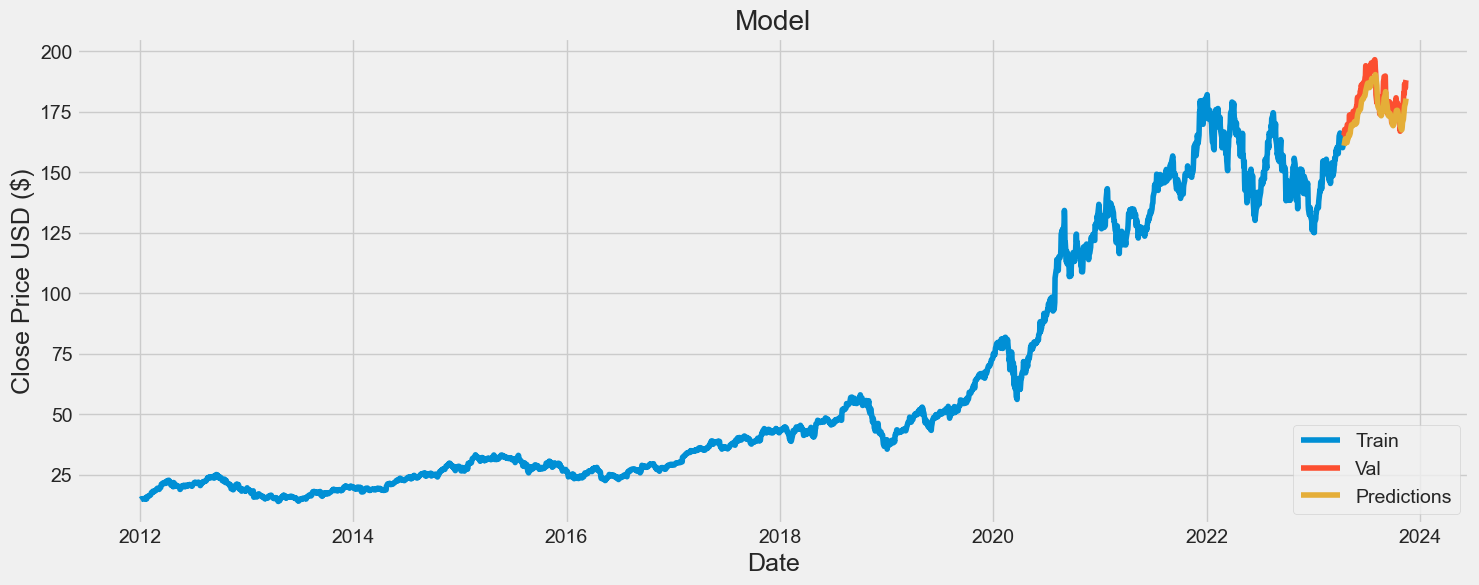

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-04-17,165.229996,161.560669
2023-04-18,166.470001,162.199158
2023-04-19,167.630005,162.966599
2023-04-20,166.649994,163.844437
2023-04-21,165.020004,164.389191
...,...,...
2023-11-09,182.410004,176.801788
2023-11-10,186.399994,177.975525
2023-11-13,184.800003,179.485382
